# **Analyzing Consumer Behavior and Spending Habits**

# Understanding the Data

## Load Data

In [630]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [631]:
warnings.filterwarnings("ignore")

In [632]:
df = pd.read_csv('data/shopping_behavior_updated.csv')

## Preview Data

In [633]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [634]:
type(df)

pandas.core.frame.DataFrame

In [635]:
df.head() 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [636]:
m = 7
df.head(m)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly


In [637]:
df.tail(m) 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [638]:
df.shape

(3900, 18)

## Summary Statistics

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [640]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [641]:
df.describe

<bound method NDFrame.describe of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2          

In [642]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [643]:
df['Item Purchased']

0         Blouse
1        Sweater
2          Jeans
3        Sandals
4         Blouse
          ...   
3895      Hoodie
3896    Backpack
3897        Belt
3898       Shoes
3899     Handbag
Name: Item Purchased, Length: 3900, dtype: object

In [644]:
df[['Category', 'Review Rating']]

,Category,Review Rating
0,Clothing,3.1
1,Clothing,3.1
2,Clothing,3.1
3,Footwear,3.5
4,Clothing,2.7
...,...,...
3895,Clothing,4.2
3896,Accessories,4.5
3897,Accessories,2.9
3898,Footwear,3.8


In [645]:
df.iloc[[102,5,12]]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
102,103,51,Male,Socks,Clothing,67,Oklahoma,L,Violet,Winter,4.8,Yes,Next Day Air,Yes,Yes,35,Credit Card,Quarterly
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
12,13,61,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly


In [646]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [647]:
df['Location'].nunique()

50

# Data Cleaning

## Missing Values

In [648]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Duplicates

In [649]:
df.duplicated().sum()

0

## Inconsistent Data

# Visualization

In [650]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [651]:
numerical_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical variables:", numerical_var)

object_var = df.select_dtypes(include=object).columns.tolist()
print("Object variables:", object_var )



Numerical variables: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Object variables: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


### Which category is purchased the most and the least?

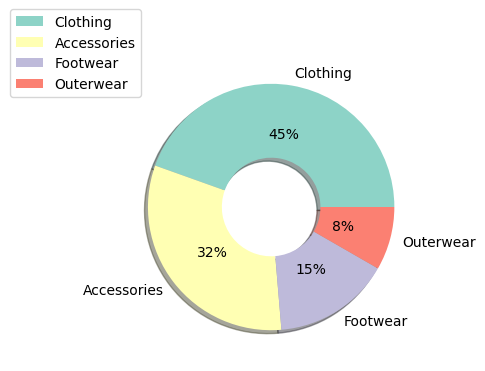

In [652]:
category_label = ["Clothing", "Accessories", "Footwear", "Outerwear"]
category_purchase = df["Category"].value_counts()
# print(category_purchase)

sns.set_palette('Set3')

plt.figure(figsize=(4,4))
plt.pie(category_purchase,labels=category_label, shadow=True,autopct="%0.0f%%",textprops={'fontsize': 10},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(0.1, 1));

Insight: Most purchases are in the Clothing category, accounting for 45% of all transactions. The least purchased category is Outerwear, making up only 8%.

### What is the amount of all purchases made?

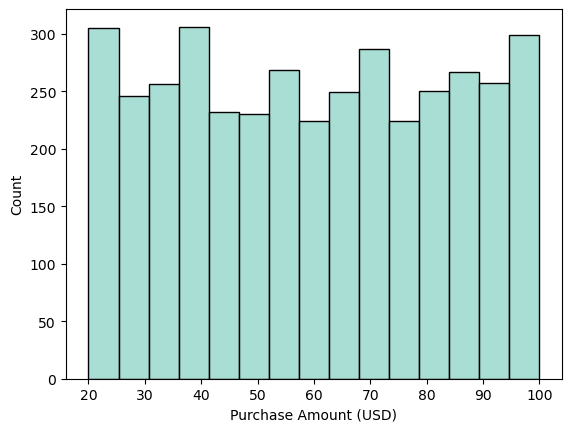

In [653]:
sns.set_palette('Set3')
sns.histplot(data=df, x="Purchase Amount (USD)")
plt.show()

Customer purchases are between USD 20 and USD 100.

### How much do customers spend per season?

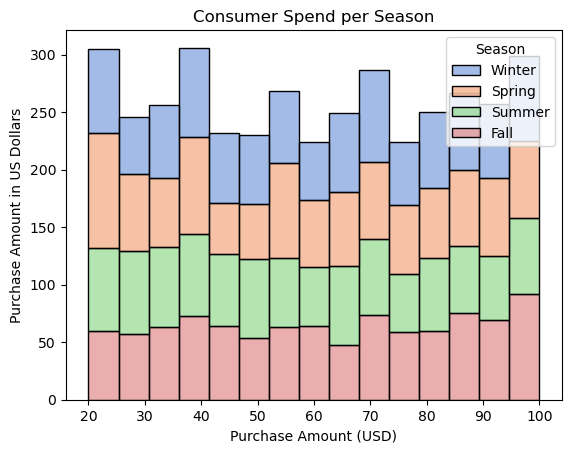

In [654]:
sns.set_palette('muted')
sns.histplot(data=df, x="Purchase Amount (USD)", hue="Season", multiple="stack", alpha=0.5)
plt.title('Consumer Spend per Season')
# plt.xlabel('Price in US Dollars')
plt.ylabel('Purchase Amount in US Dollars')
plt.show()

Insights:

1. Customers tend to spend more during Winter compared to other seasons, with Fall being the least preferred season for high-value purchases.
2. The distribution of purchase amounts does not show a strong tendency toward any specific season, indicating that consumer spending is relatively consistent across different purchase amounts.

In [655]:
# df.head()

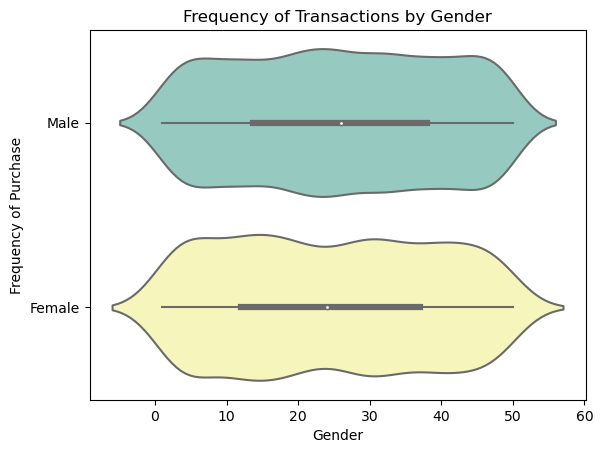

In [656]:
sns.set_palette('Set3')

sns.violinplot(y="Gender", x="Previous Purchases", data=df)
plt.title("Frequency of Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency of Purchase")
plt.show()

Insight: The customers are evenly distributed between male and female, with ages ranging from 13 to 40.

### Which locations have the highest number of purchases?

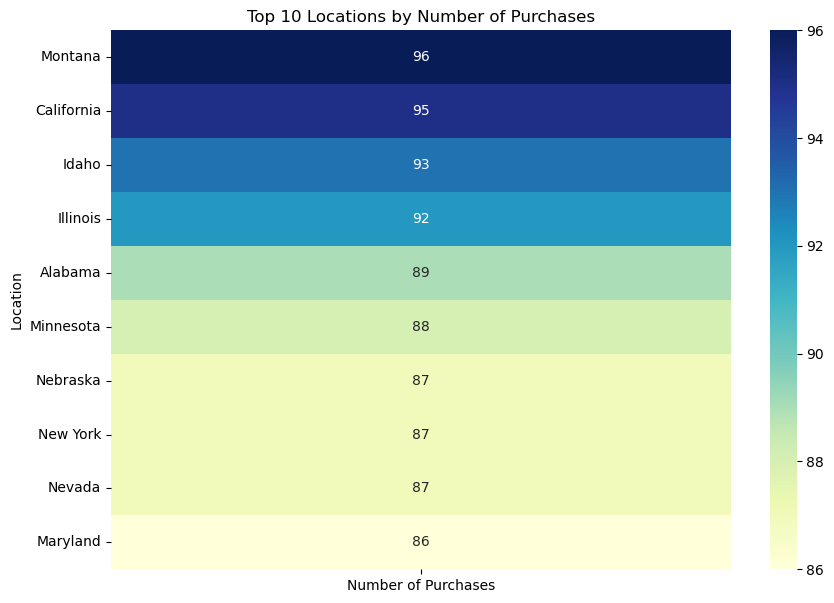

In [657]:
location_counts = df['Location'].value_counts().head(10).to_frame().reset_index()
location_counts.columns = ['Location', 'Number of Purchases']

heatmap_data = location_counts.set_index('Location') # Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={})

plt.title('Top 10 Locations by Number of Purchases')
# plt.xlabel('Number of Purchases')
plt.ylabel('Location')

plt.show()

# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

Inisght: Location 'Montana' has the highest number of purchases.

## Further analysis

### How often do customers use promo codes?

Promo codes are used in xx% of purchases

### What percentage of customers are subscribed to our services?

xx% of customers are subscribed to our services.

### What are the most preferred payment methods?

__ and __ are preferred by customers for paying purchases.

### What is the average review rating?

The average review rating is xx out of 5.